# Let's Grow More Data Science Virtual Internship Program june 2023

# LGMVIP june 2023

## BY: Remoon zean j

### INTERMEDIATE LEVEL TASK

## TASK 6: Prediction using Decision Tree Algorithm

Creating the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Dataset Link: https://bit.ly/3kXTdox

### Importing Libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [2]:
# Loading the Dataset
# Reading the Dataset
data=pd.read_csv("/content/Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
41,42,4.5,2.3,1.3,0.3,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
40,41,5.0,3.5,1.3,0.3,Iris-setosa
132,133,6.4,2.8,5.6,2.2,Iris-virginica
42,43,4.4,3.2,1.3,0.2,Iris-setosa
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
135,136,7.7,3.0,6.1,2.3,Iris-virginica
74,75,6.4,2.9,4.3,1.3,Iris-versicolor


In [4]:
data.shape

(150, 6)

In [5]:
# Dataset Columns
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#Dataset Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#Dataset Statistical Summary
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Checking Null Values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
#Checking columns count of "Species"
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Data Visualization

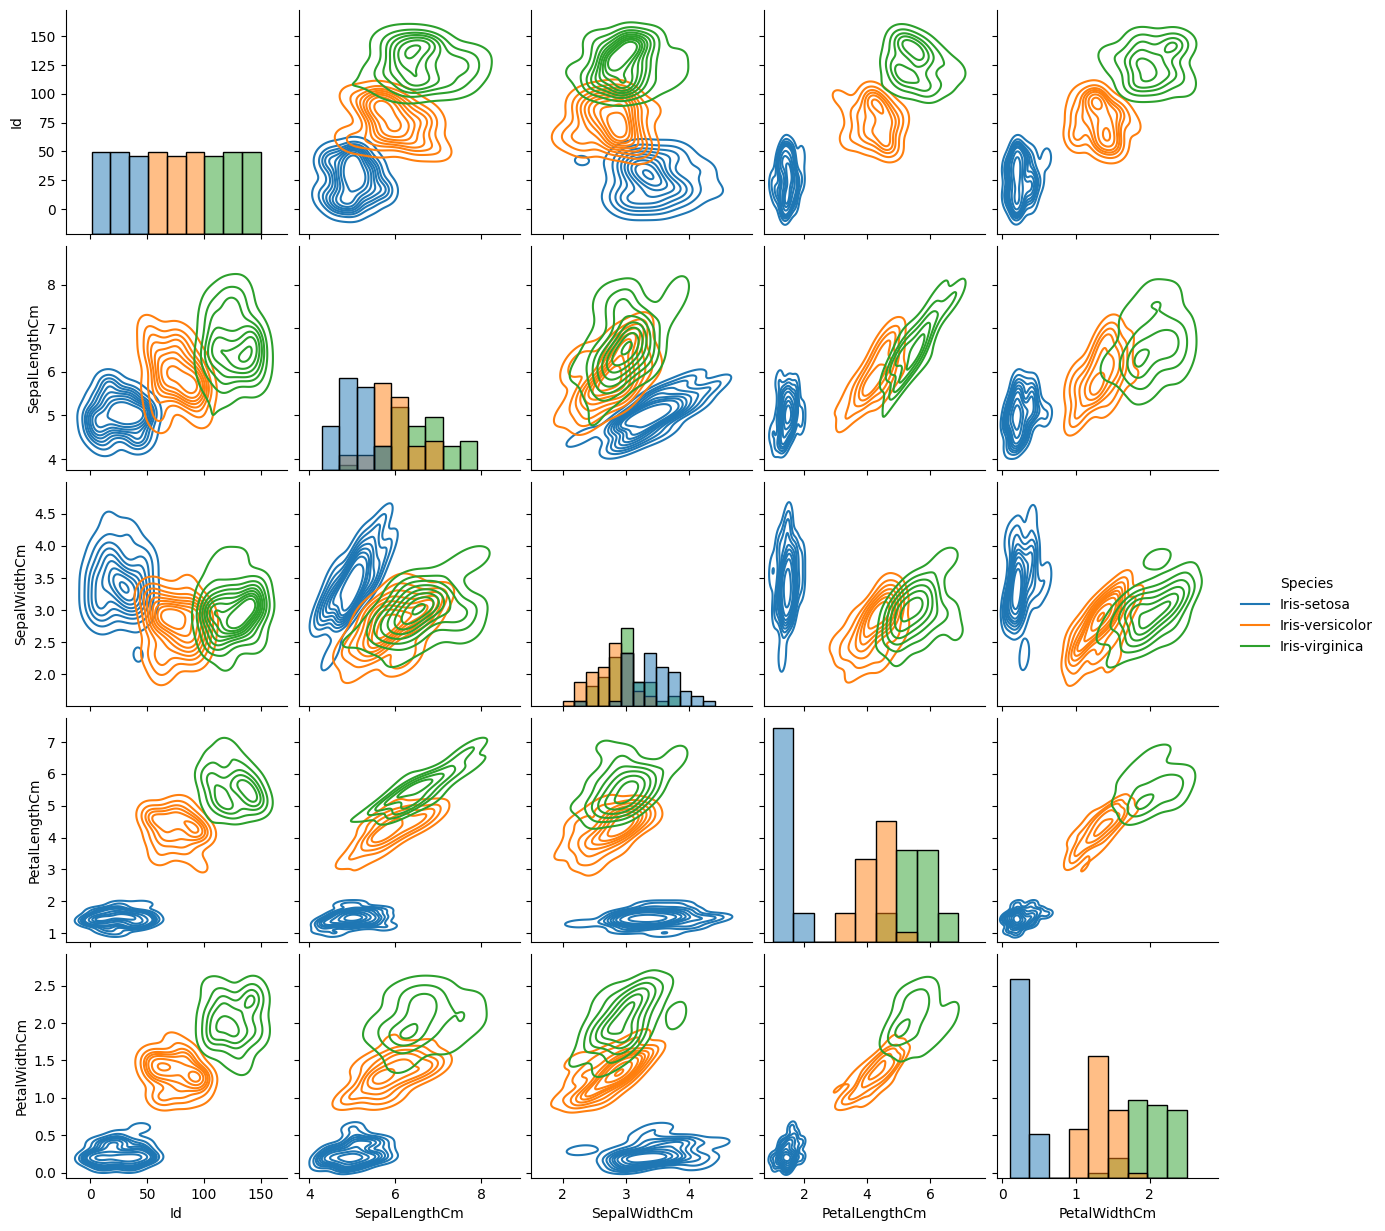

In [11]:
sns.pairplot(data, hue = "Species", kind = 'kde', diag_kind = 'hist')

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

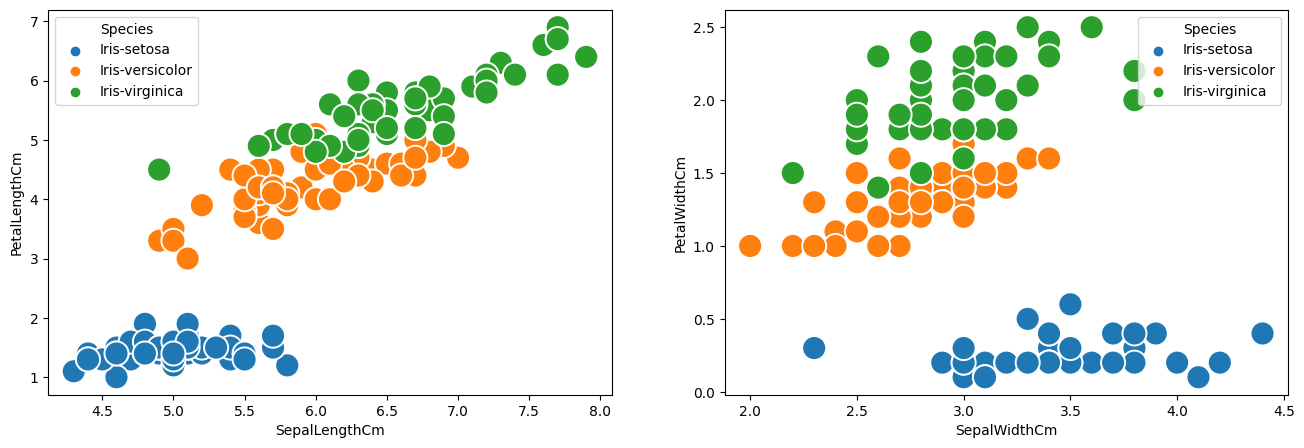

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=data,hue='Species',ax=ax1,s=300,marker='o')
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=data,hue='Species',ax=ax2,s=300,marker='o')

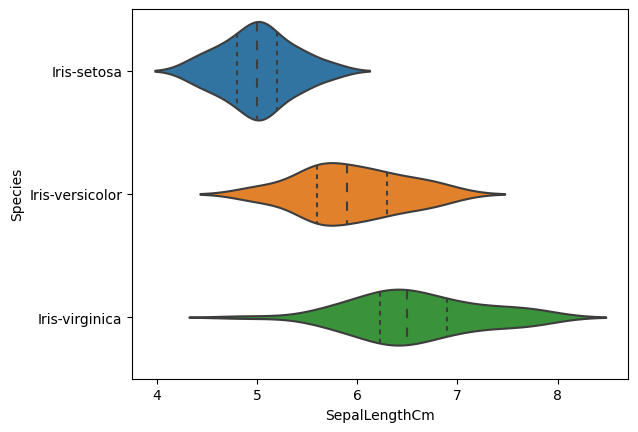

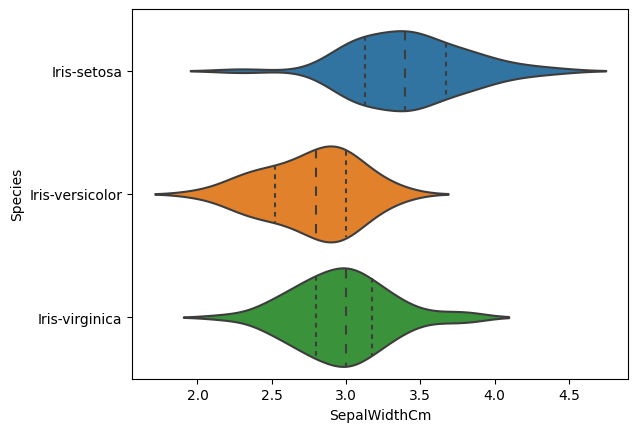

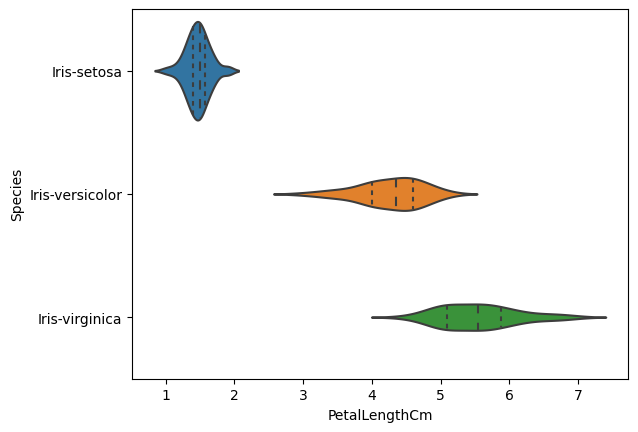

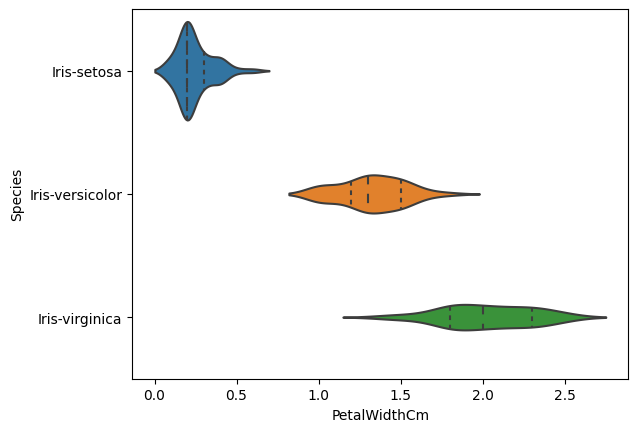

In [13]:
sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

<Axes: ylabel='Species'>

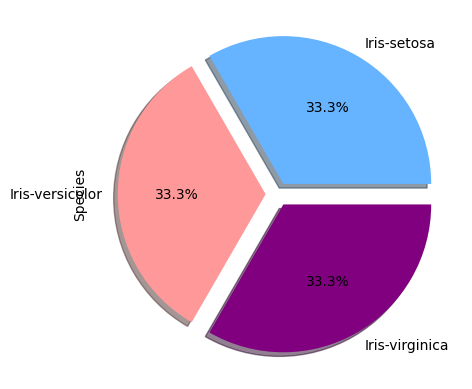

In [14]:
#Pie plot to show the overall types of Iris classifications
colors = ['#66b3ff','#ff9999','purple']
data['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])


<ipython-input-15-9b35a375bda4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True,cmap='CMRmap')


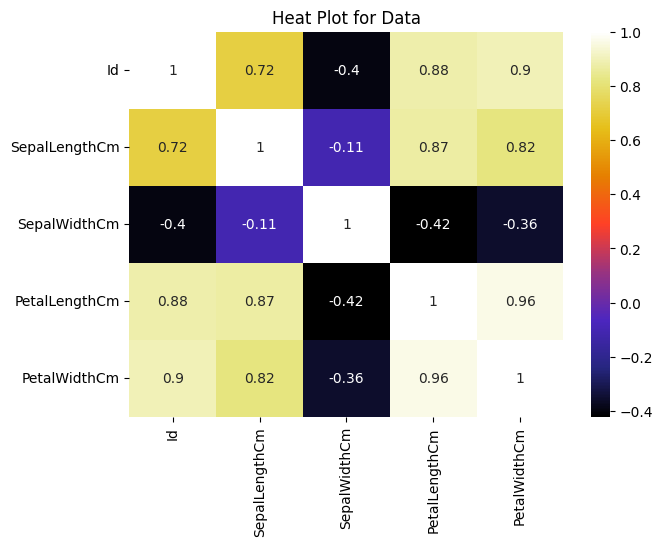

In [15]:
# Heat plot for data
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True,cmap='CMRmap')
plt.title('Heat Plot for Data')
plt.show()

In [16]:
#Defining independent and dependent variables
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = data.loc[:, features].values   #defining the feature matrix
y = data.Species

In [17]:
#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)

#Defining the decision tree classifier and fitting the training set
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'petal width(cm) <= 0.75\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = Iris-virginica'),
 Text(0.4, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(0.6, 0.75, 'petal width(cm) <= 1.75\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = Iris-virginica'),
 Text(0.4, 0.5833333333333334, 'petal length(cm) <= 5.05\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = Iris-versicolor'),
 Text(0.3, 0.4166666666666667, 'sepal length(cm) <= 5.0\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]\nclass = Iris-versicolor'),
 Text(0.2, 0.25, 'sepal width(cm) <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = Iri

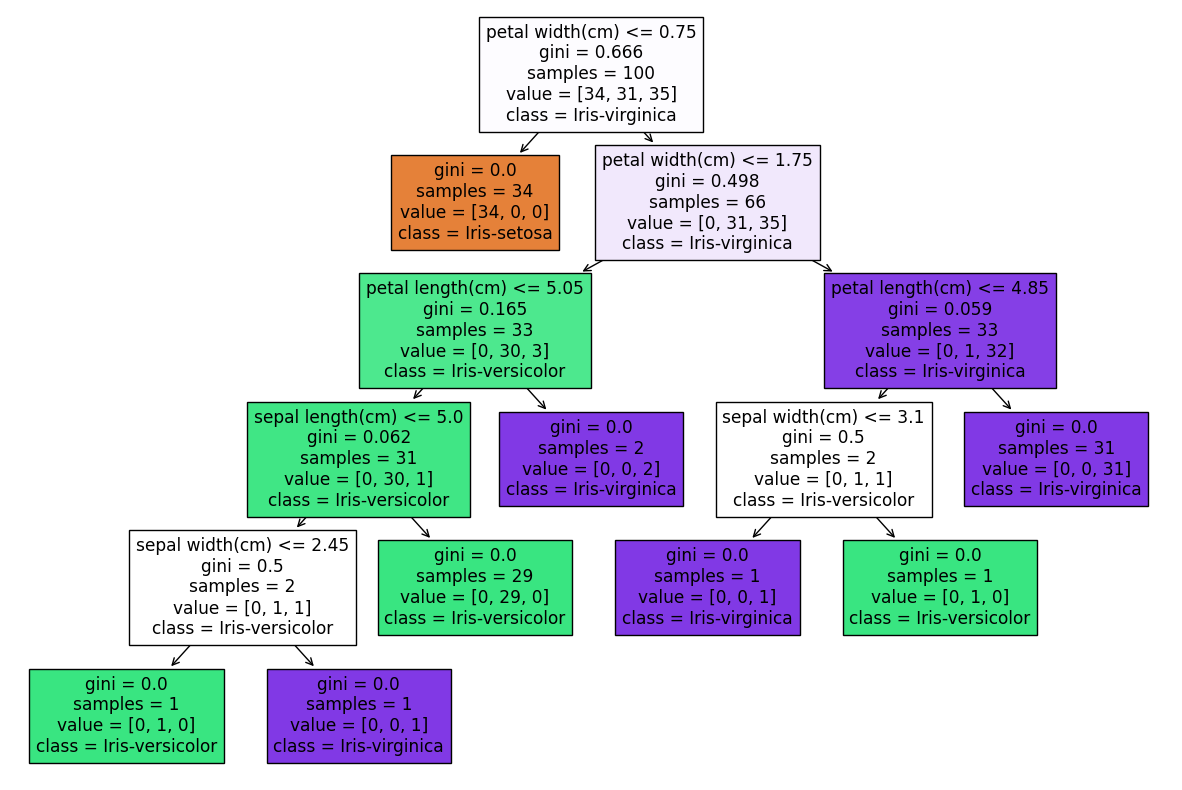

In [18]:
#Visualizing the decision tree
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= data.Species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled = True, feature_names = feature_name, class_names= class_name)


In [19]:
#Prediction on test data
y_pred = dtree.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [20]:
#Checking the accuracy of the model
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)

Accuracy: 0.96


In [21]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,y_test))
    cm = confusion_matrix(y_test, preds, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot()
    plt.show()


Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



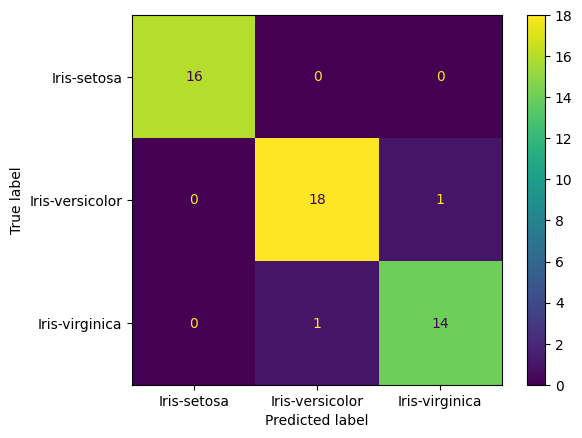

Accuracy: 96.0%


In [22]:
print('Decision Tree Classifier')
report(dtree)
print(f'Accuracy: {round(score*100,2)}%')

In [23]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]])

In [24]:
#Predicting the output class for random values for petal and sepal length and width
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 5cm, 3.6cm, 1.4cm and 0.2cm respectively

dtree.predict([[5, 3.6, 1.4 , 0.2]])

array(['Iris-setosa'], dtype=object)

In [25]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 9cm, 3.1cm, 5cm and 1.5cm respectively

dtree.predict([[9, 3.1, 5, 1.5]])

array(['Iris-versicolor'], dtype=object)

In [26]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 4.1cm, 3cm, 5.1cm and 1.8cm respectively

dtree.predict([[1, 3.0, 4.1, 0.9]])

array(['Iris-virginica'], dtype=object)

## THANK YOU!!